<a href="https://colab.research.google.com/github/Mithil01/AppliedAI-Assignments/blob/main/Backpropagation_Assignment_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>Backpropagation</font>

## <font color='red'>Loading data </font>

In [ ]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

## <font color='red'>Task 1: Implementing Forward propagation, Backpropagation and Gradient checking </font>

# <font color='red'>Task 1.1 </font>

## <font color='blue'>Forward propagation </font>


*  <b>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [ ]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    sig_z = 1/(1+np.exp(-z))
    return sig_z

In [ ]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [ ]:
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        
        val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
        part1 = np.exp(val_1)

        part2 = np.tanh(part1 + w[6])

        part3 = (np.sin(w[2]*x[2]) * (w[3]*x[3] + w[4]*x[4]) ) + w[7]
        part3 = sigmoid(part3)

        y_pred = part2 + (part3 * w[8])

        loss = (y - y_pred)**2

        dy_pred= -2*(y - y_pred)
        
        # we will be using the dictionary to find values in backpropagation, you can add other keys in dictionary as well
        
        f_dict={}
        f_dict['exp']= part1
        f_dict['sigmoid'] = part3
        f_dict['tanh'] = part2
        f_dict['loss'] = loss
        f_dict['y_pred'] = y_pred
        f_dict['dy_pred'] = dy_pred
        
        return f_dict

In [ ]:
def grader_forwardprop(data):
    d1 = (data['dy_pred']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(d1 and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

# <font color='red'>Task 1.2 </font>

## <font color='blue'>Backward propagation</font>

In [ ]:
def backward_propagation(x,y,w,f_dict):
    '''In this function, we will compute the backward propagation '''
    # forward_dict: the outputs of the forward_propagation() function
    dy_pred, sigmoid, tanh, exp = f_dict['dy_pred'],f_dict['sigmoid'],f_dict['tanh'],f_dict['exp']

    dw9 = dy_pred * sigmoid
    dw8 = dy_pred * (sigmoid * (1 - sigmoid)) * w[8]
    dw7 = dy_pred * (1 - (tanh)**2)
    dw6 = dw7 * exp
    dw5 = dw8 * np.sin(w[2]*x[2]) * x[4]
    dw4 = dw8 * np.sin(w[2]*x[2]) * x[3]
    dw3 = dw8 * ((w[3]*x[3])+(w[4]*x[4])) * np.cos(x[2]*w[2]) * x[2]
    dw2 = dw6 * 2 * ((w[0]*x[0])+(w[1]*x[1])) * x[1]
    dw1 = dw6 * 2 * ((w[0]*x[0])+(w[1]*x[1])) * x[0]
    
    #store the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
    b_dict={}
    b_dict['dw1'] = dw1
    b_dict['dw2'] = dw2
    b_dict['dw3'] = dw3
    b_dict['dw4'] = dw4
    b_dict['dw5'] = dw5
    b_dict['dw6'] = dw6
    b_dict['dw7'] = dw7
    b_dict['dw8'] = dw8
    b_dict['dw9'] = dw9

    return b_dict

In [ ]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],y[0],w,forward_dict)
grader_backprop(backward_dict)

True

# <font color='red'>Task 1.3 </font>

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

In [ ]:
def gradient_checking(x,y,w,eps):
    # compute the dict value using forward_propagation()
    forward_dict=forward_propagation(x,y,w)
    # compute the actual gradients of W using backword_propagation()
    backward_dict=backward_propagation(x,y,w,forward_dict)
    
    #storing the original gradients for the given datapoints in a list
    original_gradients_list=list(backward_dict.values())
    
    approx_gradients_list=[]
    wts = w
    
    for i in range(len(w)):
      w = [ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
            0.00114524,  0.00684168,  0.02242521,  0.01296444]
      w[i] = wts[i] + eps
      f_dict = forward_propagation(x,y,w)
      loss_f1 = f_dict["loss"]
      w[i] = wts[i] - eps
      f_dict2 = forward_propagation(x,y,w)
      loss_f2 = f_dict2["loss"]
      approx = (loss_f1-loss_f2)/(2*eps)
      approx_gradients_list.append(approx)

    #performing gradient check operation
    original_gradients_list=np.array(original_gradients_list)
    approx_gradients_list=np.array(approx_gradients_list)
    gradient_check_value = (original_gradients_list - approx_gradients_list)/(original_gradients_list + approx_gradients_list)

    return gradient_check_value
    
    

In [ ]:
def grader_grad_check(value):
    print(value) 
    assert(np.all(value <= 10**-3))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
    0.00114524,  0.00684168,  0.02242521,  0.01296444]
eps=10**-7

value= gradient_checking(X[0],y[0],w,eps)
grader_grad_check(value)

[-1.73921918e-08  1.63713365e-06  5.73356054e-05  3.77243270e-05
 -1.95446016e-04 -1.16536595e-10 -3.79907639e-10 -1.06774471e-07
 -7.02865325e-10]


True

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 2  optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: will be implementing the above algorithm with <b>Adam update</b> of weights<br><br>


### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [ ]:
from sklearn.metrics import mean_squared_error 
rate=.001
mean, std = 0, 0.01 
w = np.random.normal(mean, std, 9) 

In [ ]:
vanilla_loss=[]
vanilla_epoch=[]
for epoch in range(50):
  vanilla_epoch.append(epoch)
  y_pred=[]
  for point in range(len(data)):
    f_dict=forward_propagation(X[point], y[point], w)
    y_pred.append(f_dict['y_pred'])
    b_dict=backward_propagation(X[point],y[point],w,f_dict)
    w[8]=w[8]-rate*b_dict["dw9"]
    w[7]=w[7]-rate*b_dict["dw8"]
    w[6]=w[1]-rate*b_dict["dw7"]
    w[5]=w[2]-rate*b_dict["dw6"]
    w[4]=w[3]-rate*b_dict["dw5"]
    w[3]=w[4]-rate*b_dict["dw4"]
    w[2]=w[5]-rate*b_dict["dw3"]
    w[1]=w[6]-rate*b_dict["dw2"]
    w[0]=w[7]-rate*b_dict["dw1"]
  mse =mean_squared_error(y,y_pred) 
  vanilla_loss.append(mse)

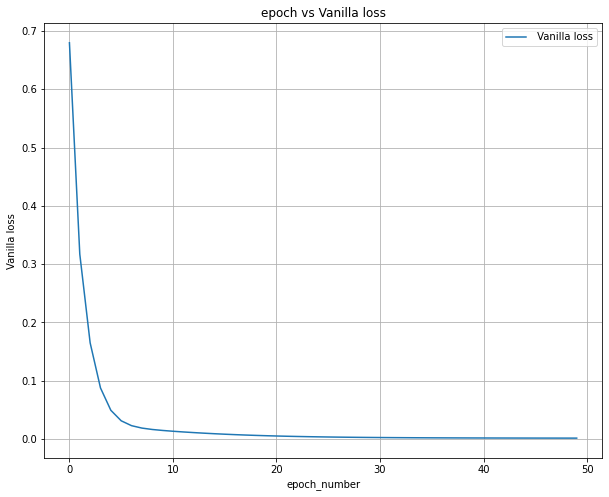

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.grid()
plt.plot(vanilla_epoch,vanilla_loss, label=' Vanilla loss')
plt.title("epoch vs Vanilla loss")
plt.xlabel("epoch_number")
plt.ylabel("Vanilla loss")
plt.legend()

### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

In [ ]:
from sklearn.metrics import mean_squared_error 
rate= 0.001
mean, std = 0, 0.01 
beta = 0.9
m = np.zeros(9)
w = np.random.normal(mean, std, 9) 

In [ ]:
mom_update_loss=[]
mom_update_epoch=[]
for epoch in range(50):
  mom_update_epoch.append(epoch)
  y_pred=[]
  for point in range(len(data)):
    f_dict=forward_propagation(X[point], y[point], w)
    y_pred.append(f_dict['y_pred'])
    b_dict=backward_propagation(X[point],y[point],w,f_dict)
    m[8] = beta*m[8] + (1-beta)*(b_dict["dw9"])
    w[8]=w[8]-rate*m[8]

    m[7] = beta*m[7] + (1-beta)*(b_dict["dw8"])
    w[7]=w[7]-rate*m[7]

    m[6] = beta*m[8] + (1-beta)*(b_dict["dw7"])
    w[6]=w[1]-rate*m[6]

    m[5] = beta*m[8] + (1-beta)*(b_dict["dw6"])
    w[5]=w[2]-rate*m[5]

    m[4] = beta*m[8] + (1-beta)*(b_dict["dw5"])
    w[4]=w[3]-rate*m[4]

    m[3] = beta*m[8] + (1-beta)*(b_dict["dw4"])
    w[3]=w[4]-rate*m[3]

    m[8] = beta*m[8] + (1-beta)*(b_dict["dw3"])
    w[2]=w[5]-rate*m[2]

    m[1] = beta*m[8] + (1-beta)*(b_dict["dw2"])
    w[1]=w[6]-rate*m[1]

    m[0] = beta*m[8] + (1-beta)*(b_dict["dw1"])
    w[0]=w[7]-rate*m[0]
  mse =mean_squared_error(y,y_pred) 
  mom_update_loss.append(mse)

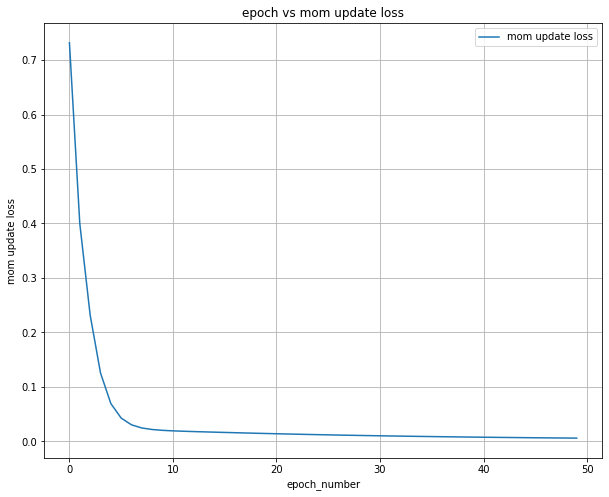

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.grid()
plt.plot(mom_update_epoch,mom_update_loss, label='mom update loss')
plt.title("epoch vs mom update loss")
plt.xlabel("epoch_number")
plt.ylabel("mom update loss")
plt.legend()

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

<img src='https://i.imgur.com/GDR8UFP.jpg'>

In [ ]:
from sklearn.metrics import mean_squared_error 
rate= 0.001
mean, std = 0, 0.01 
beta1, beta2, eps = 0.8, 0.88, 1e-7
m, v, mt, vt = np.zeros(9), np.zeros(9), np.zeros(9), np.zeros(9)
w = np.random.normal(mean, std, 9) 

In [ ]:
adam_update_loss=[]
adam_update_epoch=[]
for epoch in range(50):
  adam_update_epoch.append(epoch)
  y_pred=[]
  for point in range(len(data)):
    f_dict=forward_propagation(X[point], y[point], w)
    y_pred.append(f_dict['y_pred'])
    b_dict=backward_propagation(X[point],y[point],w,f_dict)
    m[8] = beta1*m[8] + (1-beta1)*(b_dict["dw9"])
    v[8] = beta2*v[8] + (1-beta2)*((b_dict["dw9"])**2)
    mt[8], vt[8] = m[8]/(1-beta1), v[8]/(1-beta2)
    w[8]=w[8]- (rate/np.sqrt(vt[8]+eps))*mt[8]

    m[7] = beta1*m[7] + (1-beta1)*(b_dict["dw8"])
    v[7] = beta2*v[7] + (1-beta2)*((b_dict["dw8"])**2)
    mt[7], vt[7] = m[7]/(1-beta1), v[7]/(1-beta2)
    w[7] = w[7]- (rate/np.sqrt(vt[7]+eps))*mt[7]

    m[6] = beta1*m[6] + (1-beta1)*(b_dict["dw7"])
    v[6] = beta2*v[6] + (1-beta2)*((b_dict["dw7"])**2)
    mt[6], vt[6] = m[6]/(1-beta1), v[6]/(1-beta2)
    w[6] = w[6]- (rate/np.sqrt(vt[6]+eps))*mt[6]

    m[5] = beta1*m[5] + (1-beta1)*(b_dict["dw6"])
    v[5] = beta2*v[5] + (1-beta2)*((b_dict["dw6"])**2)
    mt[5], vt[5] = m[5]/(1-beta1), v[5]/(1-beta2)
    w[5] = w[5]- (rate/np.sqrt(vt[5]+eps))*mt[5]

    m[4] = beta1*m[4] + (1-beta1)*(b_dict["dw5"])
    v[4] = beta2*v[4] + (1-beta2)*((b_dict["dw5"])**2)
    mt[4], vt[4] = m[4]/(1-beta1), v[4]/(1-beta2)
    w[4] = w[4]- (rate/np.sqrt(vt[4]+eps))*mt[4]

    m[3] = beta1*m[3] + (1-beta1)*(b_dict["dw4"])
    v[3] = beta2*v[3] + (1-beta2)*((b_dict["dw4"])**2)
    mt[3], vt[3] = m[3]/(1-beta1), v[3]/(1-beta2)
    w[3] = w[3]- (rate/np.sqrt(vt[3]+eps))*mt[3]

    m[2] = beta1*m[2] + (1-beta1)*(b_dict["dw3"])
    v[2] = beta2*v[2] + (1-beta2)*((b_dict["dw3"])**2)
    mt[2], vt[2] = m[2]/(1-beta1), v[2]/(1-beta2)
    w[2] = w[2]- (rate/np.sqrt(vt[2]+eps))*mt[2]

    m[1] = beta1*m[1] + (1-beta1)*(b_dict["dw2"])
    v[1] = beta2*v[1] + (1-beta2)*((b_dict["dw2"])**2)
    mt[1], vt[1] = m[1]/(1-beta1), v[1]/(1-beta2)
    w[1] = w[1]- (rate/np.sqrt(vt[1]+eps))*mt[1]

    m[0] = beta1*m[0] + (1-beta1)*(b_dict["dw1"])
    v[0] = beta2*v[0] + (1-beta2)*((b_dict["dw1"])**2)
    mt[0], vt[0] = m[0]/(1-beta1), v[0]/(1-beta2)
    w[0] = w[0]- (rate/np.sqrt(vt[0]+eps))*mt[0]

  mse =mean_squared_error(y,y_pred) 
  adam_update_loss.append(mse)

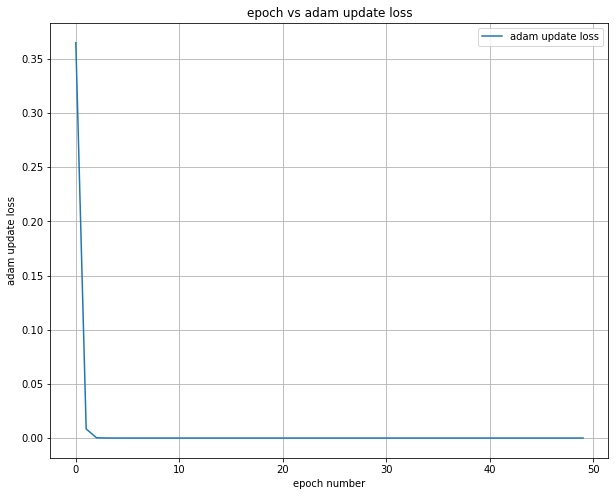

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.grid()
plt.plot(adam_update_epoch,adam_update_loss, label='adam update loss')
plt.title("epoch vs adam update loss")
plt.xlabel("epoch number")
plt.ylabel("adam update loss")
plt.legend()

<font color='blue'>Comparision plot between epochs and loss with different optimizers.</font>

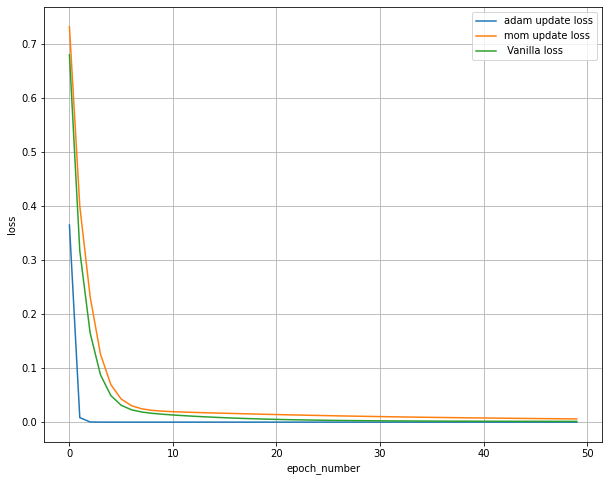

In [ ]:
#plot the graph between loss vs epochs for all 3 optimizers.
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.grid()
plt.plot(adam_update_epoch,adam_update_loss, label='adam update loss')
plt.plot(mom_update_epoch,mom_update_loss, label='mom update loss')
plt.plot(vanilla_epoch,vanilla_loss, label=' Vanilla loss')
plt.xlabel("epoch_number")
plt.ylabel("loss")
plt.legend()